In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [ ]:
train = import_data("train.csv")
test = import_data("test.csv")

print("\n\nTrain Size : \t{}\nTest Size : \t{}".format(train.shape, test.shape))

Memory usage of dataframe is 308.23 MB
Memory usage after optimization is: 83.77 MB
Decreased by 72.8%
Memory usage of dataframe is 306.70 MB
Memory usage after optimization is: 83.58 MB
Decreased by 72.7%


Train Size : 	(200000, 202)
Test Size : 	(200000, 201)


In [ ]:
train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.921875,-6.785156,11.906250,5.093750,11.460938,-9.281250,5.117188,18.625000,-4.921875,5.746094,2.925781,3.181641,14.015625,0.574707,8.796875,14.570312,5.750000,-7.238281,4.285156,30.718750,10.531250,16.218750,2.578125,2.470703,14.382812,13.429688,-5.148438,-0.407227,4.929688,5.996094,-0.308594,12.906250,-3.876953,16.890625,11.195312,10.578125,0.676270,7.886719,...,15.460938,5.312500,3.615234,5.039062,6.675781,12.664062,2.701172,-0.697266,9.601562,5.488281,-4.765625,-8.421875,20.875000,3.152344,18.562500,7.742188,-10.125000,13.726562,-3.519531,1.719727,-8.406250,9.015625,3.066406,14.367188,25.843750,5.875000,11.84375,-19.718750,17.578125,0.585938,4.433594,3.964844,3.136719,1.691406,18.515625,-2.398438,7.878906,8.562500,12.781250,-1.091797
1,train_1,0,11.500000,-4.148438,13.859375,5.390625,12.359375,7.042969,5.621094,16.531250,3.146484,8.085938,-0.403320,8.054688,14.023438,8.414062,5.433594,13.703125,13.828125,-15.585938,7.800781,28.578125,3.427734,2.740234,8.554688,3.371094,6.976562,13.890625,-11.765625,-2.558594,5.046875,0.548340,-9.296875,7.875000,1.286133,19.375000,11.367188,0.739746,2.798828,5.843750,...,29.484375,5.867188,3.820312,15.835938,-5.011719,15.132812,3.201172,9.320312,3.882812,5.800781,5.539062,5.097656,22.031250,5.511719,30.265625,10.500000,-7.234375,16.578125,-7.347656,11.078125,-5.593750,9.484375,-14.906250,9.421875,22.546875,-4.863281,7.65625,-15.929688,13.320312,-0.356689,7.640625,7.722656,2.583984,10.953125,15.429688,2.033203,8.125000,8.789062,18.359375,1.952148
2,train_2,0,8.609375,-2.746094,12.078125,7.894531,10.585938,-9.085938,6.941406,14.617188,-4.917969,5.953125,-0.324951,-11.265625,14.195312,7.312500,7.523438,14.648438,7.679688,-1.739258,4.699219,20.484375,17.750000,18.140625,1.214844,3.513672,5.675781,13.218750,-7.992188,-2.902344,5.847656,6.144531,-11.101562,12.484375,-2.287109,19.046875,11.046875,4.109375,4.699219,6.933594,...,13.203125,5.843750,4.707031,5.714844,-1.041016,20.515625,3.279297,-5.593750,7.316406,5.769531,-7.093750,-3.912109,7.257812,-5.824219,25.687500,10.921875,-0.310303,8.843750,-9.703125,2.400391,-4.292969,9.390625,-13.265625,3.154297,23.093750,-5.300781,5.37500,-6.265625,10.195312,-0.841797,2.906250,9.789062,1.669922,1.685547,21.609375,3.142578,-6.519531,8.265625,14.718750,0.396484


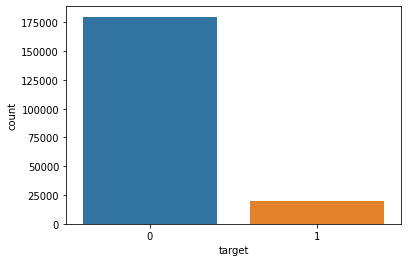

In [ ]:
sns.countplot(train['target'])

In [ ]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [ ]:
t0=train[train['target']==0]
t1=train[train['target']==1]

Distributions of 1st 100 features


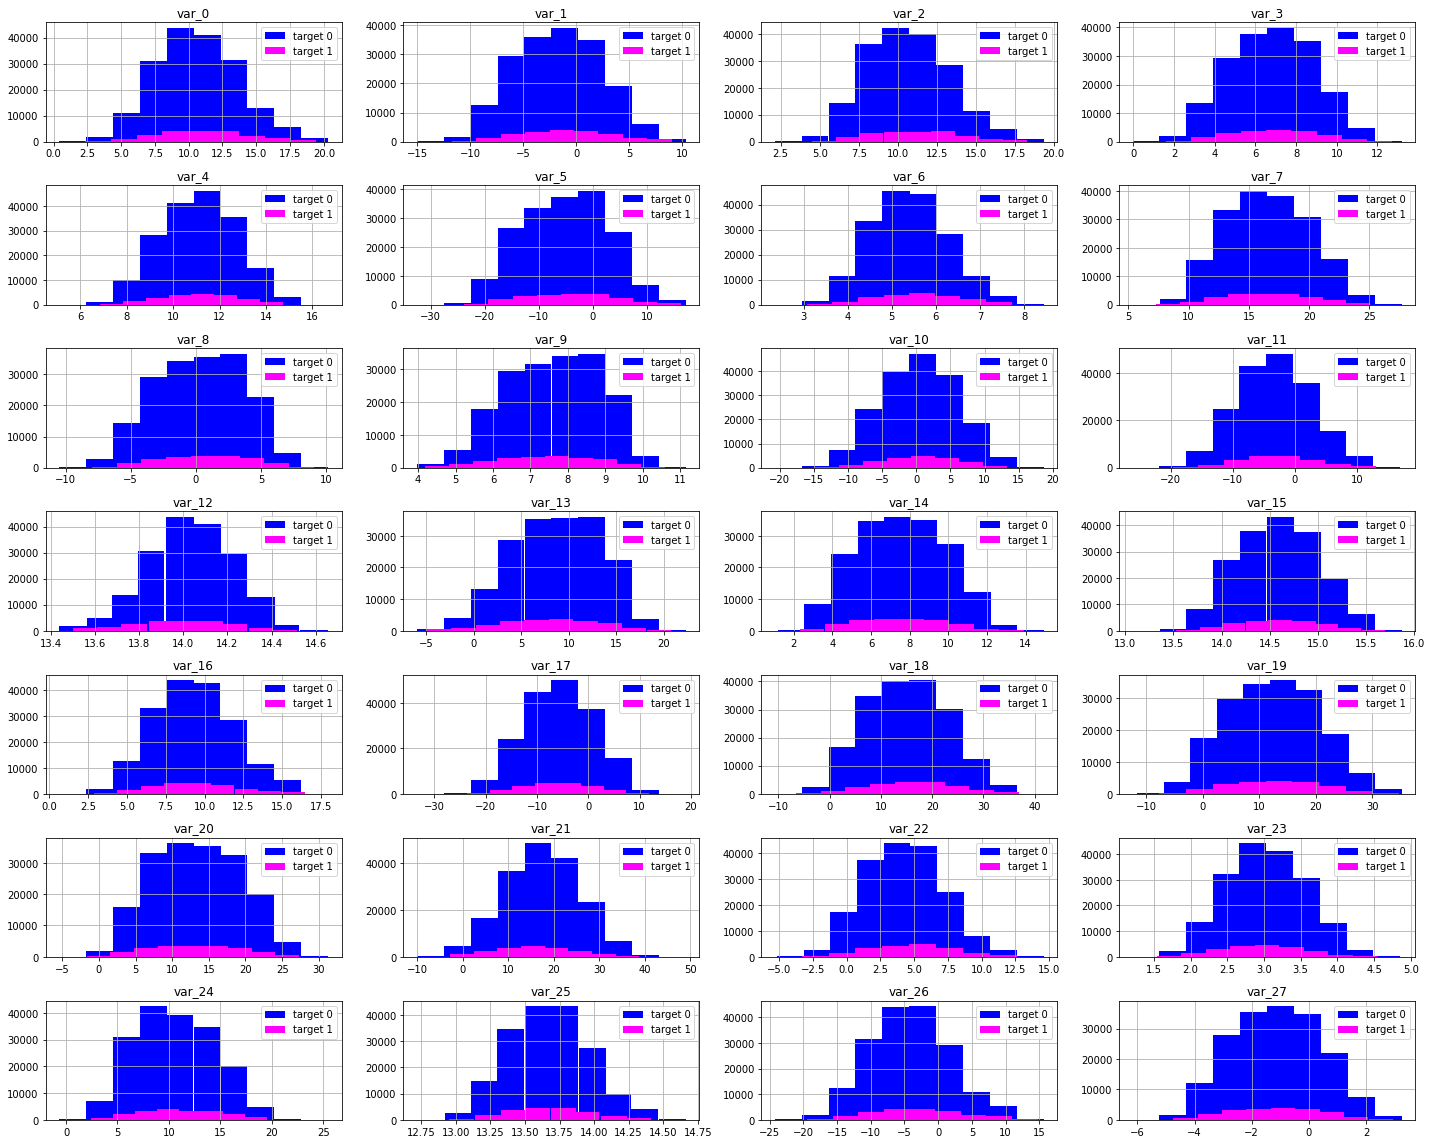

In [ ]:
print('Distributions of 1st 100 features')
plt.figure(figsize=(20,16))
for i, col in enumerate(list(train.columns)[2:30]):
    plt.subplot(7,4,i + 1)
    plt.hist(t0[col],label='target 0',color='blue')
    plt.hist(t1[col],label='target 1',color='magenta')
    plt.title(col)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [ ]:
train.drop(['ID_code'],axis=1,inplace=True)
labels=train['target']
train.drop(['target'],axis=1,inplace=True)

In [ ]:
train.select_dtypes(include='float16')

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.921875,-6.785156,11.906250,5.093750,11.460938,-9.281250,5.117188,18.625000,-4.921875,5.746094,2.925781,3.181641,14.015625,0.574707,8.796875,14.570312,5.750000,-7.238281,4.285156,30.718750,10.531250,16.218750,2.578125,2.470703,14.382812,13.429688,-5.148438,-0.407227,4.929688,5.996094,-0.308594,12.906250,-3.876953,16.890625,11.195312,10.578125,0.676270,7.886719,4.667969,3.875000,...,15.460938,5.312500,3.615234,5.039062,6.675781,12.664062,2.701172,-0.697266,9.601562,5.488281,-4.765625,-8.421875,20.875000,3.152344,18.562500,7.742188,-10.125000,13.726562,-3.519531,1.719727,-8.406250,9.015625,3.066406,14.367188,25.843750,5.875000,11.843750,-19.718750,17.578125,0.585938,4.433594,3.964844,3.136719,1.691406,18.515625,-2.398438,7.878906,8.562500,12.781250,-1.091797
1,11.500000,-4.148438,13.859375,5.390625,12.359375,7.042969,5.621094,16.531250,3.146484,8.085938,-0.403320,8.054688,14.023438,8.414062,5.433594,13.703125,13.828125,-15.585938,7.800781,28.578125,3.427734,2.740234,8.554688,3.371094,6.976562,13.890625,-11.765625,-2.558594,5.046875,0.548340,-9.296875,7.875000,1.286133,19.375000,11.367188,0.739746,2.798828,5.843750,10.812500,3.677734,...,29.484375,5.867188,3.820312,15.835938,-5.011719,15.132812,3.201172,9.320312,3.882812,5.800781,5.539062,5.097656,22.031250,5.511719,30.265625,10.500000,-7.234375,16.578125,-7.347656,11.078125,-5.593750,9.484375,-14.906250,9.421875,22.546875,-4.863281,7.656250,-15.929688,13.320312,-0.356689,7.640625,7.722656,2.583984,10.953125,15.429688,2.033203,8.125000,8.789062,18.359375,1.952148
2,8.609375,-2.746094,12.078125,7.894531,10.585938,-9.085938,6.941406,14.617188,-4.917969,5.953125,-0.324951,-11.265625,14.195312,7.312500,7.523438,14.648438,7.679688,-1.739258,4.699219,20.484375,17.750000,18.140625,1.214844,3.513672,5.675781,13.218750,-7.992188,-2.902344,5.847656,6.144531,-11.101562,12.484375,-2.287109,19.046875,11.046875,4.109375,4.699219,6.933594,10.890625,0.900391,...,13.203125,5.843750,4.707031,5.714844,-1.041016,20.515625,3.279297,-5.593750,7.316406,5.769531,-7.093750,-3.912109,7.257812,-5.824219,25.687500,10.921875,-0.310303,8.843750,-9.703125,2.400391,-4.292969,9.390625,-13.265625,3.154297,23.093750,-5.300781,5.375000,-6.265625,10.195312,-0.841797,2.906250,9.789062,1.669922,1.685547,21.609375,3.142578,-6.519531,8.265625,14.718750,0.396484
3,11.062500,-2.152344,8.953125,7.195312,12.585938,-1.835938,5.843750,14.921875,-5.859375,8.242188,2.306641,2.810547,13.843750,11.968750,6.457031,14.835938,10.742188,-0.429932,15.945312,13.726562,20.296875,12.554688,6.820312,2.722656,12.132812,13.734375,0.813477,-0.905762,5.906250,2.839844,-15.242188,10.437500,-2.572266,6.179688,10.609375,-5.914062,8.171875,2.851562,9.171875,0.666504,...,31.890625,5.968750,7.207031,3.890625,-11.085938,17.250000,2.587891,-2.701172,0.563965,5.343750,-7.152344,-6.191406,18.234375,11.710938,14.750000,8.101562,11.875000,13.953125,-10.468750,5.695312,-3.753906,8.414062,1.898438,7.261719,-0.463867,-0.049805,7.933594,-12.828125,12.414062,1.848633,4.464844,4.742188,0.717773,1.421875,23.031250,-1.270508,-2.927734,10.289062,17.968750,-9.000000
4,9.835938,-1.483398,12.875000,6.636719,12.273438,2.449219,5.941406,19.250000,6.265625,7.679688,-9.445312,-12.140625,13.851562,7.890625,7.789062,15.054688,8.484375,-3.068359,6.527344,11.312500,21.421875,18.953125,10.109375,2.714844,14.210938,13.546875,3.173828,-3.341797,5.902344,7.933594,-3.158203,9.468750,-0.008301

In [ ]:
train.astype(np.float64).describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679915,-1.627622,10.715197,6.796529,11.078332,-5.065317,5.408950,16.545850,0.284159,7.567232,0.394345,-3.245594,14.023974,8.530234,7.537616,14.573122,9.333266,-5.696725,15.244022,12.438567,13.290895,17.257906,4.305429,3.019539,10.584406,13.667489,-4.055132,-1.137908,5.532979,5.053875,-7.687739,10.393051,-0.512886,14.774145,11.434252,3.842504,2.187230,5.868902,10.642127,0.662960,...,24.259330,5.633293,5.362896,11.002168,-2.871901,19.315753,2.963335,-4.151153,4.937120,5.636009,-0.004964,-0.831780,19.817089,-0.677967,20.210674,11.640607,-2.799589,11.882933,-1.014062,2.591444,-2.741667,10.085515,0.719107,8.769091,12.756677,-3.983262,8.970279,-10.335046,15.377177,0.746071,3.234442,7.438408,1.927839,3.331777,17.993789,-0.142089,2.303335,8.908157,15.870719,-3.326541
std,3.040059,4.050044,2.640890,2.043315,1.623149,7.863268,0.866605,3.418077,3.332635,1.235062,5.500796,5.970255,0.190071,4.639536,2.247916,0.411714,2.557428,6.712608,7.851378,7.996688,5.876248,8.196591,2.847957,0.526891,3.777251,0.285547,5.922209,1.523714,0.783369,2.615940,7.965196,2.159893,2.587829,4.322341,0.541622,5.179559,3.119977,2.249731,4.278901,4.068845,...,10.880275,0.217941,1.419610,5.262059,5.457778,5.024170,0.369686,7.798018,3.105982,0.369442,4.424627,5.378012,8.674153,5.966676,7.136419,2.892159,7.513953,2.628891,8.579803,2.798958,5.261245,1.371864,8.963430,4.474928,9.318287,4.725170,3.189757,11.574704,3.944606,0.976347,4.559926,3.023272,1.478423,3.992031,3.135158,1.429375,5.454369,0.921631,3.010945,10.438014
min,0.408447,-15.046875,2.117188,-0.040192,5.074219,-32.562500,2.347656,5.351562,-10.507812,3.970703,-20.734375,-26.093750,13.437500,-6.011719,1.013672,13.078125,0.635254,-33.375000,-10.664062,-12.406250,-5.433594,-10.085938,-5.324219,1.209961,-0.678223,12.718750,-24.250000,-6.167969,2.089844,-4.789062,-34.812500,2.140625,-8.984375,1.508789,9.820312,-16.515625,-8.093750,-1.183594,-6.335938,-14.546875,...,-7.453125,4.851562,0.623047,-6.531250,-20.000000,3.816406,1.851562,-35.968750,-5.250000,4.257812,-14.507812,-22.484375,-11.453125,-22.750000,-2.996094,3.242188,-29.109375,4.953125,-29.265625,-7.855469,-22.031250,5.417969,-26.000000,-4.808594,-18.484375,-22.578125,-3.021484,-47.750000,4.414062,-2.554688,-14.093750,-2.691406,-3.814453,-11.781250,8.695312,-5.

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(train)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,...,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16


In [ ]:
missing_data(test)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,category,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,...,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16


In [ ]:
features = train.columns.tolist()

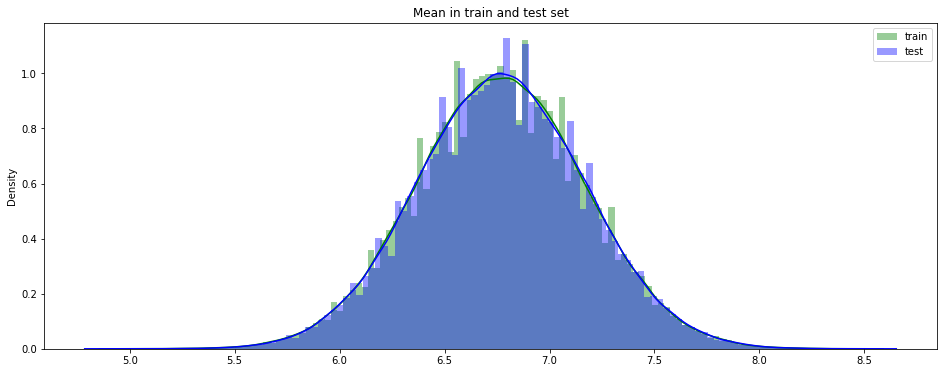

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Mean in train and test set")
sns.distplot(train[features].mean(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].mean(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

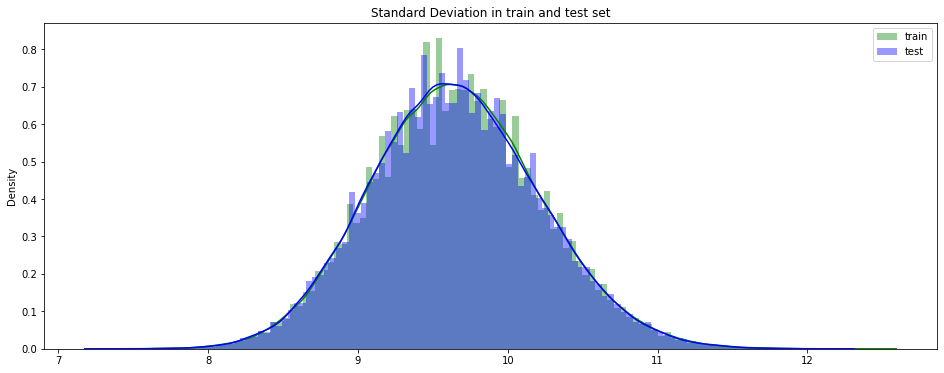

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Standard Deviation in train and test set")
sns.distplot(train[features].std(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].std(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

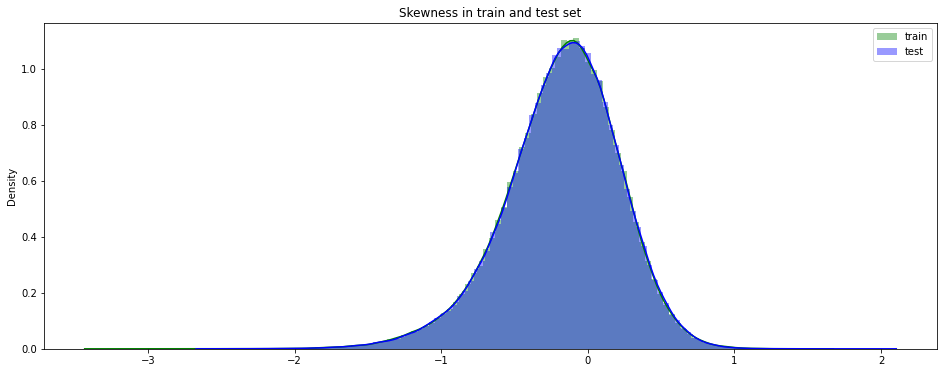

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Skewness in train and test set")
sns.distplot(train[features].skew(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].skew(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

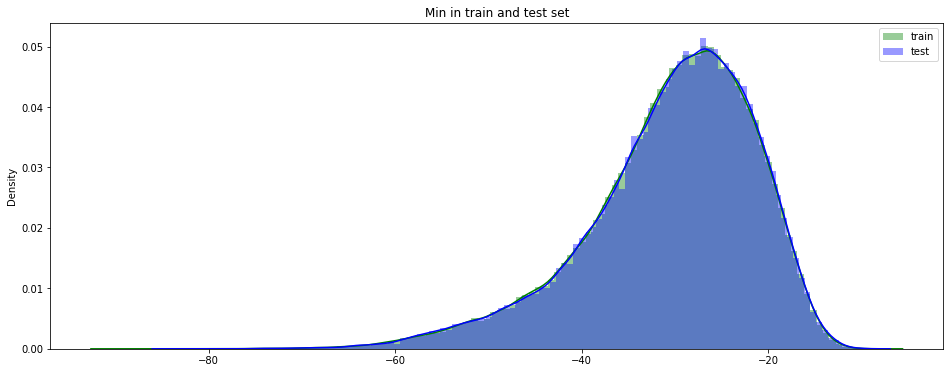

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Min in train and test set")
sns.distplot(train[features].min(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].min(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

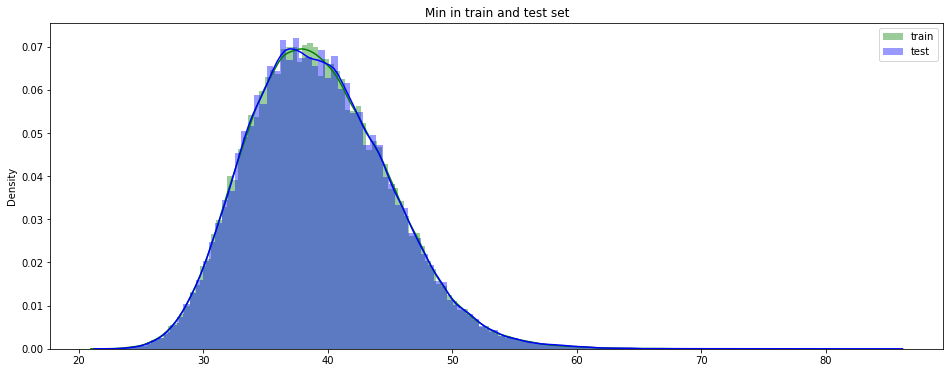

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Min in train and test set")
sns.distplot(train[features].max(axis=1), color="green", kde=True, bins=120, label='train')
sns.distplot(test[features].max(axis=1), color="blue", kde=True, bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
features = train.columns.values[2:202]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [ ]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,66,106,10,124,23,41,89,123,146,13,159,91,179,32,48
Feature,var_68,var_108,var_12,var_126,var_25,var_43,var_91,var_125,var_148,var_15,var_161,var_93,var_181,var_34,var_50
Max duplicates,40233,6127,3221,2746,2087,1836,1811,1780,1578,1431,1355,1191,1071,1060,922
Value,5.01953,14.2031,13.9766,11.5391,13.6875,11.5078,6.98438,12.5547,4.02344,14.625,5.60938,10.625,10.7969,11.5625,12.4922


In [ ]:
np.transpose((pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,66,106,10,124,23,41,89,123,146,13,159,91,32,179,48
Feature,var_68,var_108,var_12,var_126,var_25,var_43,var_91,var_125,var_148,var_15,var_161,var_93,var_34,var_181,var_50
Max duplicates,39964,5987,3164,2747,2116,1944,1848,1824,1617,1532,1387,1217,1088,1028,956
Value,5.01953,14.2031,13.9766,11.5391,13.6406,11.4609,7.03125,12.5391,4.00781,14.5156,5.74219,10.5312,11.4453,10.7969,12.6875


In [ ]:
idx = features = train.columns.values[2:202]
for df in [test, train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

In [ ]:
train.head(2)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,8.921875,-6.785156,11.906250,5.093750,11.460938,-9.281250,5.117188,18.62500,-4.921875,5.746094,2.925781,3.181641,14.015625,0.574707,8.796875,14.570312,5.750000,-7.238281,4.285156,30.718750,10.531250,16.218750,2.578125,2.470703,14.382812,13.429688,-5.148438,-0.407227,4.929688,5.996094,-0.308594,12.90625,-3.876953,16.890625,11.195312,10.578125,0.676270,7.886719,4.667969,3.875000,...,9.601562,5.488281,-4.765625,-8.421875,20.87500,3.152344,18.562500,7.742188,-10.125000,13.726562,-3.519531,1.719727,-8.40625,9.015625,3.066406,14.367188,25.843750,5.875000,11.84375,-19.718750,17.578125,0.585938,4.433594,3.964844,3.136719,1.691406,18.515625,-2.398438,7.878906,8.562500,12.781250,-1.091797,1454.0,-21.453125,43.1250,7.375000,9.320312,0.100464,NaN,6.773438
1,11.500000,-4.148438,13.859375,5.390625,12.359375,7.042969,5.621094,16.53125,3.146484,8.085938,-0.403320,8.054688,14.023438,8.414062,5.433594,13.703125,13.828125,-15.585938,7.800781,28.578125,3.427734,2.740234,8.554688,3.371094,6.976562,13.890625,-11.765625,-2.558594,5.046875,0.548340,-9.296875,7.87500,1.286133,19.375000,11.367188,0.739746,2.798828,5.843750,10.812500,3.677734,...,3.882812,5.800781,5.539062,5.097656,22.03125,5.511719,30.265625,10.500000,-7.234375,16.578125,-7.347656,11.078125,-5.59375,9.484375,-14.906250,9.421875,22.546875,-4.863281,7.65625,-15.929688,13.320312,-0.356689,7.640625,7.722656,2.583984,10.953125,15.429688,2.033203,8.125000,8.789062,18.359375,1.952148,1408.0,-47.375000,40.5625,7.109375,10.351562,-0.357422,NaN,7.222656


In [ ]:
train.drop(['kurt'],axis=1,inplace=True)

In [ ]:
train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,sum,min,max,mean,std,skew,med
0,8.921875,-6.785156,11.906250,5.093750,11.460938,-9.281250,5.117188,18.625000,-4.921875,5.746094,2.925781,3.181641,14.015625,0.574707,8.796875,14.570312,5.750000,-7.238281,4.285156,30.718750,10.531250,16.218750,2.578125,2.470703,14.382812,13.429688,-5.148438,-0.407227,4.929688,5.996094,-0.308594,12.906250,-3.876953,16.890625,11.195312,10.578125,0.676270,7.886719,4.667969,3.875000,...,-0.697266,9.601562,5.488281,-4.765625,-8.421875,20.875000,3.152344,18.562500,7.742188,-10.125000,13.726562,-3.519531,1.719727,-8.406250,9.015625,3.066406,14.367188,25.843750,5.875000,11.843750,-19.718750,17.578125,0.585938,4.433594,3.964844,3.136719,1.691406,18.515625,-2.398438,7.878906,8.562500,12.781250,-1.091797,1454.0,-21.453125,43.12500,7.375000,9.320312,0.100464,6.773438
1,11.500000,-4.148438,13.859375,5.390625,12.359375,7.042969,5.621094,16.531250,3.146484,8.085938,-0.403320,8.054688,14.023438,8.414062,5.433594,13.703125,13.828125,-15.585938,7.800781,28.578125,3.427734,2.740234,8.554688,3.371094,6.976562,13.890625,-11.765625,-2.558594,5.046875,0.548340,-9.296875,7.875000,1.286133,19.375000,11.367188,0.739746,2.798828,5.843750,10.812500,3.677734,...,9.320312,3.882812,5.800781,5.539062,5.097656,22.031250,5.511719,30.265625,10.500000,-7.234375,16.578125,-7.347656,11.078125,-5.593750,9.484375,-14.906250,9.421875,22.546875,-4.863281,7.656250,-15.929688,13.320312,-0.356689,7.640625,7.722656,2.583984,10.953125,15.429688,2.033203,8.125000,8.789062,18.359375,1.952148,1408.0,-47.375000,40.56250,7.109375,10.351562,-0.357422,7.222656
2,8.609375,-2.746094,12.078125,7.894531,10.585938,-9.085938,6.941406,14.617188,-4.917969,5.953125,-0.324951,-11.265625,14.195312,7.312500,7.523438,14.648438,7.679688,-1.739258,4.699219,20.484375,17.750000,18.140625,1.214844,3.513672,5.675781,13.218750,-7.992188,-2.902344,5.847656,6.144531,-11.101562,12.484375,-2.287109,19.046875,11.046875,4.109375,4.699219,6.933594,10.890625,0.900391,...,-5.593750,7.316406,5.769531,-7.093750,-3.912109,7.257812,-5.824219,25.687500,10.921875,-0.310303,8.843750,-9.703125,2.400391,-4.292969,9.390625,-13.265625,3.154297,23.093750,-5.300781,5.375000,-6.265625,10.195312,-0.841797,2.906250,9.789062,1.669922,1.685547,21.609375,3.142578,-6.519531,8.265625,14.718750,0.396484,1235.0,-22.406250,33.87500,6.230469,8.773438,-0.063354,5.898438
3,11.062500,-2.152344,8.953125,7.195312,12.585938,-1.835938,5.843750,14.921875,-5.859375,8.242188,2.306641,2.810547,13.843750,11.968750,6.457031,14.835938,10.742188,-0.429932,15.945312,13.726562,20.296875,12.554688,6.820312,2.722656,12.132812,13.734375,0.813477,-0.905762,5.906250,2.839844,-15.242188,10.437500,-2.572266,6.179688,10.609375,-5.914062,8.171875,2.851562,9.171875,0.666504,...,-2.701172,0.563965,5.343750,-7.152344,-6.191406,18.234375,11.710938,14.750000,8.101562,11.875000,13.953125,-10.468750,5.695312,-3.753906,8.414062,1.898438,7.261719,-0.463867,-0.049805,7.933594,-12.828125,12.414062,1.848633,4.464844,4.742188,0.717773,1.421875,23.031250,-1.270508,-2.927734,10.289062,17.968750,-9.000000,1279.0,-35.156250,38.09375,6.464844,9.617188,-0.484863,6.703125
4,9.835938,-1.483398,12.875000,6.636719,12.273438,2.449219,5.941406,19.250000,6.265625,7.679688,-9.445312,-12.140625,13.851562,7.890625,7.789062,15.054688,8.484375,-3.068359,6.527344,11.312500,21.421875,18.953125,10.109375,2.714844,14.210938,13.546875,3.173828,-3.341797,5.902344,7.933594,-3.158203,9.468750,-0.008301,19.328125,12.406250,0.632812,2.792

In [ ]:
test.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,test_0,11.06250,7.781250,12.953125,9.429688,11.429688,-2.380859,5.847656,18.265625,2.132812,8.812500,-2.025391,-4.355469,13.968750,0.345703,7.539062,14.5000,7.703125,-19.09375,15.578125,16.171875,3.708984,18.812500,1.589844,3.064453,6.449219,14.117188,-9.492188,-2.191406,5.710938,3.787109,-1.797852,9.265625,2.066406,12.773438,11.335938,8.148438,-0.061005,3.533203,9.781250,...,4.339844,5.183594,4.261719,1.677734,29.078125,8.468750,18.125,12.281250,-0.691406,10.218750,-5.558594,2.292969,-4.535156,10.390625,-15.492188,3.968750,31.359375,-1.165039,9.289062,-23.578125,13.265625,1.659180,-2.156250,11.851562,-1.429688,2.451172,13.710938,2.466797,4.367188,10.71875,15.46875,-8.71875,1398.0,-31.984375,42.03125,7.046875,9.945312,-0.081299,NaN,7.195312
1,test_1,8.53125,1.253906,11.304688,5.187500,9.195312,-4.011719,6.019531,18.625000,-4.414062,5.972656,-1.380859,-0.331055,14.109375,2.566406,5.500000,14.1875,7.019531,4.65625,29.156250,0.091003,12.148438,3.138672,5.257812,2.421875,16.203125,13.500000,-5.234375,-3.664062,5.707031,2.996094,-10.468750,11.492188,-0.965820,15.343750,10.632812,0.896484,6.742188,2.341797,12.867188,...,7.054688,5.390625,-0.771973,-8.179688,29.921875,-5.628906,10.500,9.609375,-0.493408,8.171875,-4.359375,5.210938,0.408691,12.000000,-10.382812,5.847656,25.203125,-8.843750,11.828125,-8.710938,15.906250,0.980957,10.617188,8.835938,0.940430,10.125000,15.578125,0.477295,-1.485352,9.87500,19.12500,-20.96875,1240.0,-41.187500,35.59375,6.269531,9.578125,-0.562012,NaN,6.437500


In [ ]:
test.drop(['kurt','ID_code'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train)

In [ ]:
train_data.shape

(200000, 207)

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, labels.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=labels.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=labels.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(labels, oof)))

Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.89825	valid_1's auc: 0.879616
[2000]	training's auc: 0.909121	valid_1's auc: 0.887001
[3000]	training's auc: 0.916486	valid_1's auc: 0.89076
[4000]	training's auc: 0.922143	valid_1's auc: 0.892964
[5000]	training's auc: 0.926928	valid_1's auc: 0.894197
[6000]	training's auc: 0.931282	valid_1's auc: 0.895054
[7000]	training's auc: 0.935236	valid_1's auc: 0.895687
[8000]	training's auc: 0.938973	valid_1's auc: 0.895849
[9000]	training's auc: 0.942489	valid_1's auc: 0.895852
[10000]	training's auc: 0.945822	valid_1's auc: 0.896089
[11000]	training's auc: 0.949042	valid_1's auc: 0.895991
[12000]	training's auc: 0.95217	valid_1's auc: 0.895911
[13000]	training's auc: 0.955084	valid_1's auc: 0.89595
Early stopping, best iteration is:
[10104]	training's auc: 0.946157	valid_1's auc: 0.896193
Fold 1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.898256	valid_

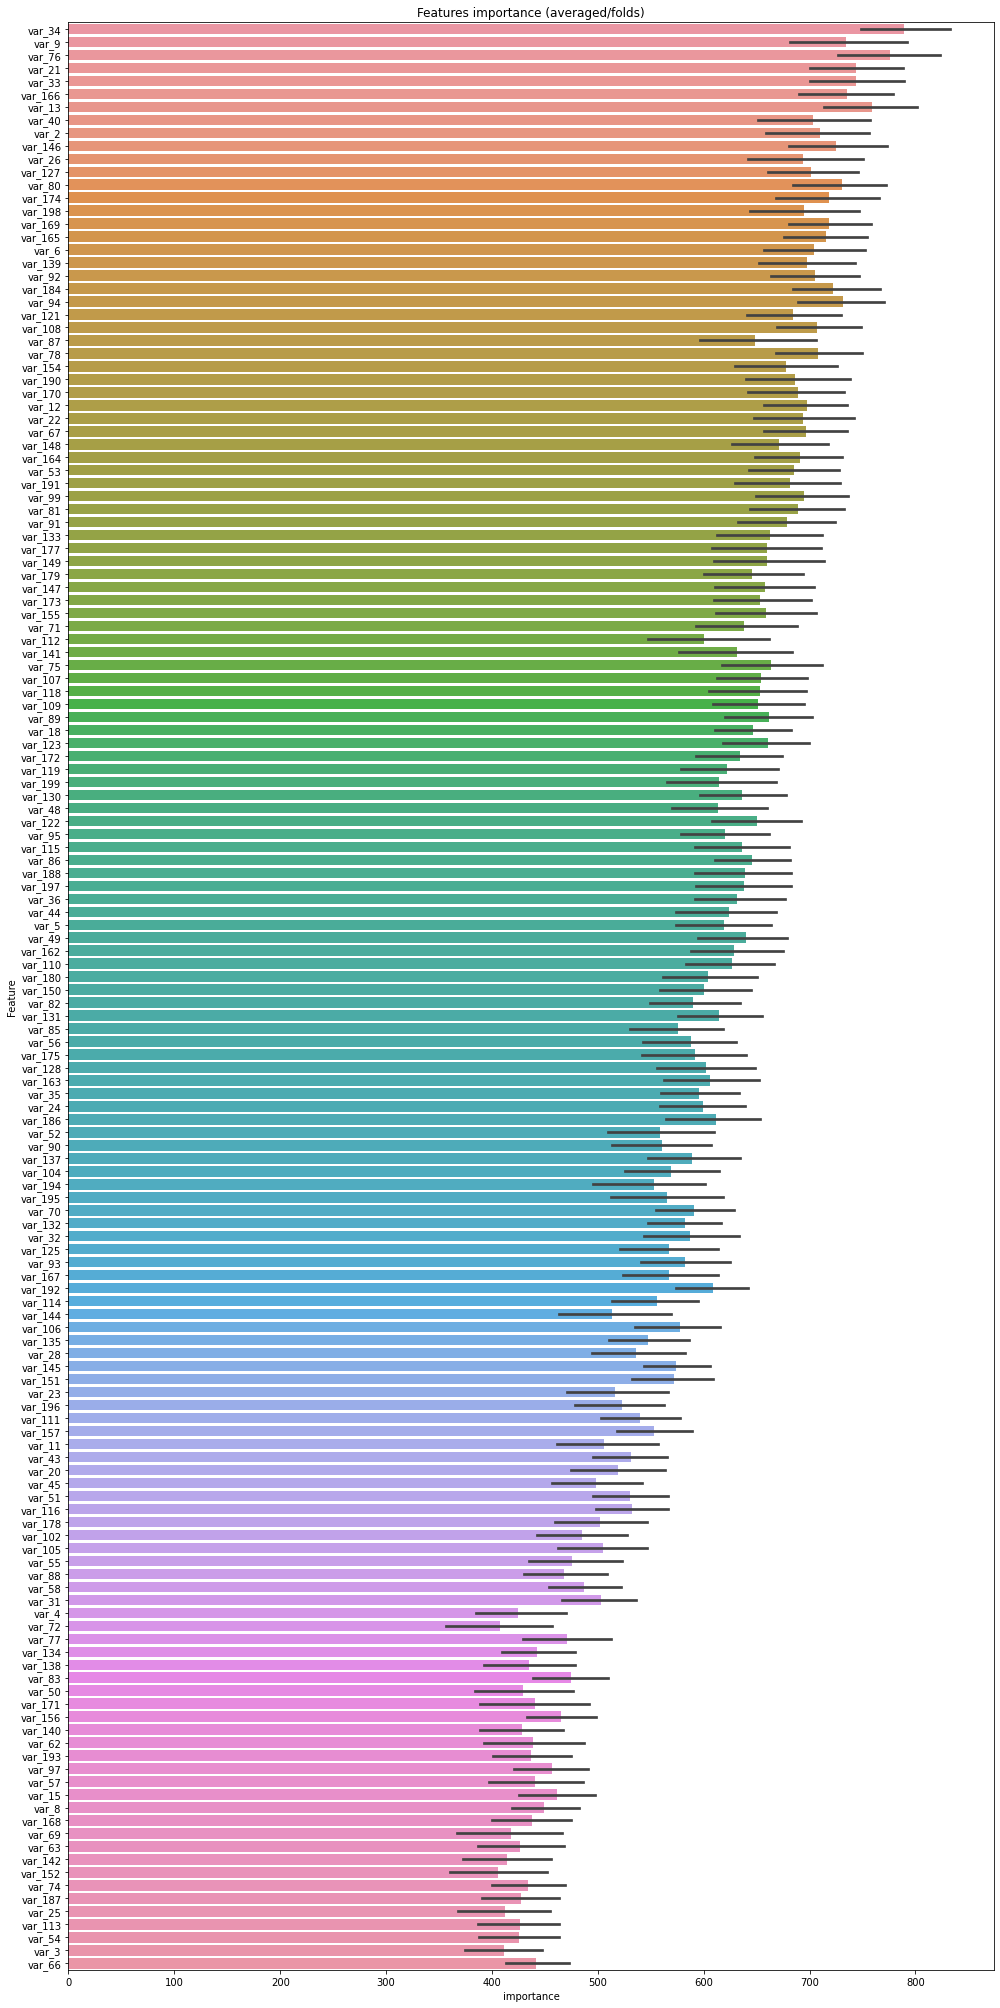

In [ ]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from random import randrange, uniform
from scipy.stats import chi2_contingency
%matplotlib inline

In [ ]:
trans = pd.read_csv("train.csv")

In [ ]:
for i in range(2,202):
        #print(i)
        q75, q25 = np.percentile(trans.iloc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        #print(min)
        #print(max)
       
        trans = trans.drop(trans[trans.iloc[:,i] < min].index)
        trans = trans.drop(trans[trans.iloc[:,i] > max].index)

In [ ]:
trans.shape

(175073, 202)

In [ ]:
trans.to_csv("outlier values.csv")

{'boxes': [<matplotlib.patches.PathPatch at 0x7f87c6a3c6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f87beb0dfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f87be932b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f87c720d7d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f87be8e9cd0>,
  <matplotlib.lines.Line2D at 0x7f87c622e2d0>]}

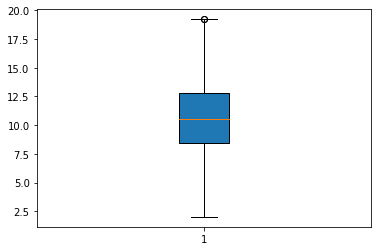

In [ ]:
plt.boxplot(trans['var_0'] ,vert=True,patch_artist=True)

In [ ]:
trans = trans.drop(trans.columns[0], axis = 1)

In [ ]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(trans.drop('target',axis=1), 
                                                    trans['target'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(122551, 200)
(52522, 200)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from math import log

Printing parameter Data and Corresponding Log value
   Parameter value  Corresponding Log Value
0           0.0001                -4.000000
1           0.0010                -3.000000
2           0.0100                -2.000000
3           0.1000                -1.000000
4           1.0000                 0.000000
5           5.0000                 0.698970
6          10.0000                 1.000000
7          20.0000                 1.301030
8          30.0000                 1.477121
9          40.0000                 1.602060


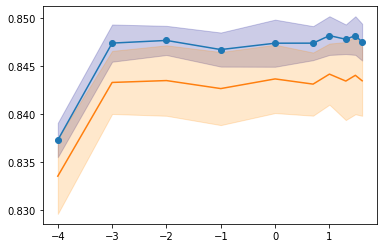

In [ ]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV

C = LogisticRegression()

import math

parameter_data = [0.0001,0.001,0.01,0.1,1,5,10,20,30,40]

log_my_data = [math.log10(x) for x in parameter_data]

#print(log_my_data)
print("Printing parameter Data and Corresponding Log value")
data={'Parameter value':parameter_data,'Corresponding Log Value':log_my_data}
param=pd.DataFrame(data)
print("="*100)
print(param)
parameters = {'C':parameter_data}
clf = RandomizedSearchCV(C, parameters, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(x_train, y_train)



train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(log_my_data, train_auc, label='Train AUC')
plt.gca().fill_between(log_my_data,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_my_data, cv_auc, label='CV AUC')

plt.gca().fill_between(log_my_data,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_my_data, train_auc, label='Train AUC points')

In [ ]:
test =pd.read_csv("test.csv")

In [ ]:
id_code = test.iloc[:,0]

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV

C = RandomForestClassifier()

n_estimators=[10,50,100,200]
max_depth=[1, 5, 10, 50]

import math

log_max_depth = [math.log10(x) for x in max_depth]
log_n_estimators=[math.log10(x) for x in n_estimators]

print("Printing parameter Data and Corresponding Log value for Max Depth")
data={'Parameter value':max_depth,'Corresponding Log Value':log_max_depth}
param=pd.DataFrame(data)
print("="*100)
print(param)

print("Printing parameter Data and Corresponding Log value for Estimators")
data={'Parameter value':n_estimators,'Corresponding Log Value':log_n_estimators}
param=pd.DataFrame(data)
print("="*100)
print(param)

parameters = {'n_estimators':n_estimators, 'max_depth':max_depth}
clf = GridSearchCV(C, parameters, cv=3, scoring='roc_auc', return_train_score=True,n_jobs=-1)
clf.fit(x_train, y_train)



train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Printing parameter Data and Corresponding Log value for Max Depth
   Parameter value  Corresponding Log Value
0                1                  0.00000
1                5                  0.69897
2               10                  1.00000
3               50                  1.69897
Printing parameter Data and Corresponding Log value for Estimators
   Parameter value  Corresponding Log Value
0               10                  1.00000
1               50                  1.69897
2              100                  2.00000
3              200                  2.30103
